In [0]:
X = [-10.0,-9.591836734693878,-9.183673469387756,-8.775510204081632,-8.36734693877551,-7.959183673469388,-7.551020408163265,-7.142857142857142,-6.73469387755102,-6.326530612244898,-5.918367346938775,-5.5102040816326525,-5.1020408163265305,-4.6938775510204085,-4.285714285714286,-3.8775510204081627,-3.4693877551020407,-3.0612244897959187,-2.6530612244897958,-2.244897959183673,-1.8367346938775508,-1.4285714285714288,-1.020408163265305,-0.612244897959183,-0.204081632653061,0.204081632653061,0.612244897959183,1.0204081632653068,1.4285714285714288,1.8367346938775508,2.2448979591836746,2.6530612244897966,3.0612244897959187,3.4693877551020407,3.8775510204081627,4.2857142857142865,4.6938775510204085,5.1020408163265305,5.510204081632654,5.918367346938776,6.326530612244898,6.73469387755102,7.142857142857142,7.551020408163264,7.95918367346939,8.367346938775512,8.775510204081634,9.183673469387756,9.591836734693878,10.0]

In [0]:
Y = [-733.5947654032336,-760.0537230174541,-601.5197365960986,-383.4749602692311,-337.417887119182,-546.5415475606083,-286.06766548507164,-335.6896566898281,-277.15993735149493,-178.4610127119249,-163.7900176767281,2.9767561311078623,-35.777756440072906,-73.91168304416973,-20.249245238576968,-13.77525440823539,116.21535999279145,-42.89298215350978,17.01825092565759,-93.92821837253918,-259.95851970102893,63.058652546951514,85.40196207330447,-74.68339933683882,226.80453021914172,-145.18233665468475,5.7924366564933205,-15.594261550620313,159.66276108599152,158.3426037790365,34.092520706352396,66.18223892143251,-47.659228232229026,-140.8137967089196,42.42227604478357,117.0051593010686,253.17322569417135,284.18115481613717,164.44261086687686,218.0182438419047,194.71554557439643,215.54846170288798,251.96773312408763,690.1898651698056,524.5457508938455,620.3912455607324,636.3039028682663,945.8222873745366,822.6863229884273,1088.7259719786032]

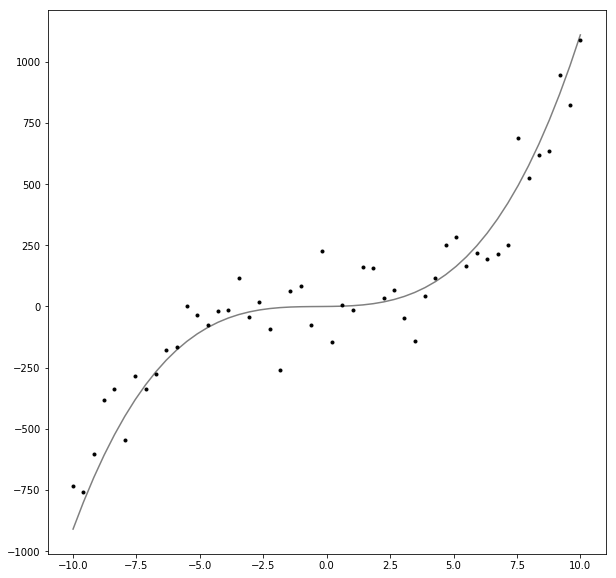

In [9]:
np.random.seed(0)

X = np.linspace(-10, 10, 50)
Y_gt = (X **3 + X**2 + X)
Y = Y_gt + np.random.normal(0, 100, len(X))

poly = PolynomialFeatures(degree=30, include_bias=False)
X_poly = poly.fit_transform(X[:, np.newaxis])

plt.figure(figsize=(10, 10))
plt.plot(X, Y_gt, color='gray')
plt.plot(X, Y, '.', color='k')
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

poly = PolynomialFeatures(degree=30, include_bias=False)
X = np.array(X)

X_poly = poly.fit_transform(X[:, np.newaxis])
xs = np.linspace(-10, 10, 200)

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

model_plain = linear_model.LinearRegression(normalize=True)
model_plain.fit(X_poly, Y)
Y_plain = model_plain.predict(poly.fit_transform(xs[:, np.newaxis]))
print('No Regularization Model')
print(model_plain.coef_)

No Regularization Model
[-150.631  177.708  169.642 -141.097 -43.431  45.353  4.465 -7.849 -0.177
  0.829 -0.004 -0.057  0.001  0.003 -0.000 -0.000  0.000  0.000 -0.000
 -0.000  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000 -0.000  0.000
  0.000]


In [13]:
print('{}'.format(model_plain.intercept_))
for i, _c in enumerate(model_plain.coef_):
    print('{}'.format(_c), end="\r\n")

-16.66591043526011
-150.63087508580625
177.70766932004187
169.64170986600988
-141.09656184682393
-43.43106080412336
45.353484575109064
4.464521398880165
-7.849227371781534
-0.17703636637231482
0.8288144510301084
-0.0036506469858616345
-0.057372108312573486
0.0007260336719231306
0.002724215555858063
-3.739050208532126e-05
-9.125270805883868e-05
1.1116561693770785e-06
2.1885816348400307e-06
-2.1603227138520633e-08
-3.770446286613611e-08
2.8384888297461234e-10
4.623566336823606e-10
-2.5088949681694994e-12
-3.934989790699266e-12
1.4325603573162993e-14
2.2073893034086645e-14
-4.780599751310627e-17
-7.334439817478892e-17
7.08902717020997e-20
1.092732354350013e-19


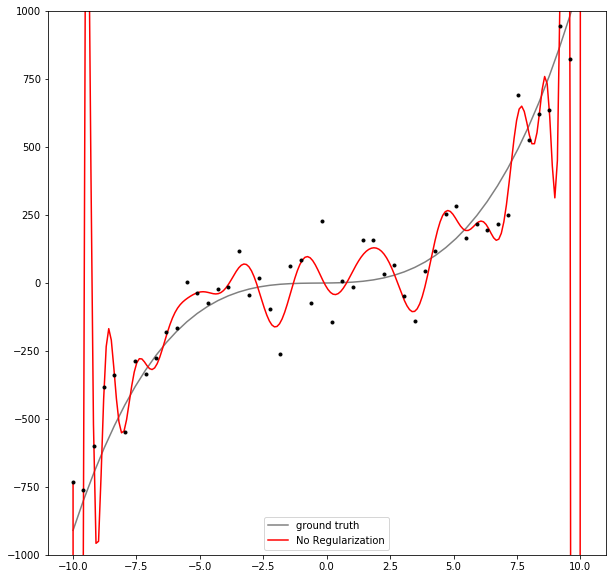

In [10]:
plt.figure(figsize=(10, 10))
p = plt.subplot()
p.plot(X, Y_gt, color='gray', label='ground truth')
p.plot(xs, Y_plain, color='r', markersize=2, label='No Regularization')
p.plot(X, Y, '.', color='k')
p.legend()
p.set_ylim(-1000, 1000)

plt.show()